In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pyarrow as pa
import pyarrow.parquet as pq
import os
import random
sns.set_style("whitegrid")
!pip install matrixprofile
import matrixprofile as mp
import matplotlib.gridspec as gridspec
from sklearn import preprocessing
import matplotlib.patches as mpatches

You should consider upgrading via the '/Users/byrdsmyth/Documents/School/Thesis/CodeBase/CodeFromClasses/yunshu/bin/python3.7 -m pip install --upgrade pip' command.


In [3]:
#Variable for figure size (w,h)
fgsz = (3, 5)

In [4]:
os.chdir('/Users/byrdsmyth/Documents/School/Thesis/Stimuli')

In [5]:
# Location of DFs
tempTopDir = os.path.abspath('/Volumes/Britt_SSD/ReDoEvals3')

In [6]:
#############################
# Evaluations Section
#############################
evalsFile = os.path.join(tempTopDir, 'comboEval.parquet')
# Make evals to df
allEvalsDF = pd.read_parquet(evalsFile)

In [7]:
# Generate list of agents in order
evalAgents = allEvalsDF.agentNum.unique()
print(evalAgents)
evalAgents = allEvalsDF.agent.unique()
print(evalAgents)
# evalAgents = ["Afraid of Ghosts", "Focused on Normal Pills", "Prioritizes Normal Pills", "Focused on Power Pills", "Standard Game Play"]

[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
['pop700' 'pop23' 'fear2' 'fear18' 'nml3' 'nml21' 'std300' 'std2' 'std23'
 'std232']


In [8]:
temp = allEvalsDF[allEvalsDF['agentNum']==2]
temp.agent.unique()

array(['fear2'], dtype=object)

In [9]:
# Df for each Agent Training
evalDFsList = []

pp700K_Path = os.path.join(tempTopDir, 'pp700.parquet')
pp700K_df = pd.read_parquet(pp700K_Path)
evalDFsList.append(pp700K_df)

pp23_Path = os.path.join(tempTopDir, "pp23.parquet")
pp23M_DF = pd.read_parquet(pp23_Path)
evalDFsList.append(pp23M_DF)

fear2M_Path = os.path.join(tempTopDir, 'fear2.parquet')
fear2M_DF = pd.read_parquet(fear2M_Path)
evalDFsList.append(fear2M_DF)

fear18_Path = os.path.join(tempTopDir, 'fear18.parquet')
fear18M_df = pd.read_parquet(fear18_Path)
evalDFsList.append(fear18M_df)

nml3_Path = os.path.join(tempTopDir, 'nml3.parquet')
nml3M_DF = pd.read_parquet(nml3_Path)
evalDFsList.append(nml3M_DF)

nml21_Path = os.path.join(tempTopDir, 'nml21.parquet')
nml21M_DF = pd.read_parquet(nml21_Path)
evalDFsList.append(nml21M_DF)

std300K_Path = os.path.join(tempTopDir, 'std300.parquet')
std300k_df = pd.read_parquet(std300K_Path)
evalDFsList.append(std300k_df)

std2M_Path = os.path.join(tempTopDir, 'std2.parquet')
std2M_df = pd.read_parquet(std2M_Path)
evalDFsList.append(std2M_df)

std23M_Path = os.path.join(tempTopDir, 'std23.parquet')
std23M_df = pd.read_parquet(std23M_Path)
evalDFsList.append(std23M_df)

std23M_2Path = os.path.join(tempTopDir, 'std23_2.parquet')
std23M_2df = pd.read_parquet(std23M_2Path)
evalDFsList.append(std23M_2df)

# Df for each Agent Training Key States
evalKeysDFsList = []

pp700K__Key_df = pd.DataFrame()
evalKeysDFsList.append(pp700K_df)

pp23M__Key_DF = pd.DataFrame()
evalKeysDFsList.append(pp23M_DF)

fear2M__Key_DF = pd.DataFrame()
evalKeysDFsList.append(fear2M_DF)

fear18M__Key_df = pd.DataFrame()
evalKeysDFsList.append(fear18M_df)

nml3M__Key_DF = pd.DataFrame()
evalKeysDFsList.append(nml3M_DF)

nml21M__Key_DF = pd.DataFrame()
evalKeysDFsList.append(nml21M_DF)

std300k__Key_df = pd.DataFrame()
evalKeysDFsList.append(std300k_df)

std2M__Key_df = pd.DataFrame()
evalKeysDFsList.append(std2M_df)

std23M__Key_df = pd.DataFrame()
evalKeysDFsList.append(std23M_df)

std23M_2_Key_df = pd.DataFrame()
evalKeysDFsList.append(std23M_2df)

# Df for each Agent Evaluation
for index, agent in enumerate(evalAgents):
    temp = allEvalsDF[allEvalsDF['agent'] == agent]
    evalDFsList[index] = temp
    print(evalDFsList[index].agent.unique())
    temp = evalDFsList[index]
    temp2 = temp[temp['keyNum'] > 0]
    evalKeysDFsList[index] = temp2
    print(evalKeysDFsList[index].agent.unique())
    


['pop700']
['pop700']
['pop23']
['pop23']
['fear2']
['fear2']
['fear18']
['fear18']
['nml3']
['nml3']
['nml21']
['nml21']
['std300']
['std300']
['std2']
['std2']
['std23']
['std23']
['std232']
['std232']


In [10]:
action_names = ['UP', 'RIGHT', 'LEFT', 'DOWN']


In [11]:
workingDir = "/Volumes/Britt_SSD/ReDoEvals3/"
agent_files = ['pp700/Visuals',"pp23/Visuals",'Fear2/Visuals','fear18/Visuals','NmlOnly3/Visuals',
               'NmlOnly21/Visuals','std300/Visuals','Std2/Visuals','Std23/Visuals','std23_2/Visuals']


In [12]:
allEvalsDF.tail(5)
# episode == life
# epoch == game

action_name  action  reward  episode_reward  epoch_reward  total_reward  \
99955          UP     1.0     0.0           110.0         110.0       30030.0   
99956          UP     1.0    10.0           120.0         120.0       30040.0   
99957        DOWN     4.0     0.0           120.0         120.0       30040.0   
99958        DOWN     4.0     0.0           120.0         120.0       30040.0   
99959       RIGHT     2.0    10.0           130.0         130.0       30050.0   

       lives  end_of_episode  end_of_epoch  episode  ...  blue_x_relative  \
99955    3.0           False         False     34.0  ...              0.0   
99956    3.0           False         False     34.0  ...              0.0   
99957    3.0           False         False     34.0  ...              0.0   
99958    3.0           False         False     34.0  ...              0.0   
99959    3.0           False         False     34.0  ...              8.0   

       blue_y_relative  orange_x_relative  orange_y_relative  pink_x_relative  \
99955              0.0               -6.0               12.0              0.0   
99956              0.0                0.0                0.0              1.0   
99957              0.0                0.0                6.0             -1.0   
99958              0.0                6.0                1.0              0.0   
99959             -9.0               -2.0                1.0              0.0   

       pink_y_relative  pacman_x_relative  pacman_y_relative     PP  isDBG  
99955              0.0                3.0               -4.0  False    0.0  
99956             -3.0                3.0                0.0  False    0.0  
99957             -4.0                2.0                0.0  False    0.0  
99958              0.0                2.0                4.0  False    0.0  
99959              0.0                3.0               -4.0  False    0.0  

[5 rows x 99 columns]

In [12]:
# threshold = 0
# for index, aNum in enumerate(allEvalsDF.agentNum.unique()):
#     df = allEvalsDF[allEvalsDF['agentNum']== aNum]
#     temp2 = df
#     temp2['compared1'] = abs(temp2["to_db1"]-temp2["to_db2"])
#     temp2['compared2'] = abs(temp2['to_db2']-temp2['to_db3'])
#     temp2['compared3'] = abs(temp2['to_db3']-temp2['to_db4'])
#     temp2['compared4'] = abs(temp2['to_db4']-temp2['to_db1'])
#     print("Queried DBG locs and about to enter loop")
    
    
#     temp = temp2.loc[(temp2['compared1']>threshold) &
#                      (temp2['compared2']>threshold) &
#                      (temp2['compared3']>threshold) &
#                      (temp2['compared4']>threshold)]
    
#     print(temp.head(3))

In [13]:
# sns.set_style("whitegrid")
# threshold = 50
# colors = ['red','green','dodgerblue','gold','darkorange','slategrey']
# colors2 = ['slategrey','dodgerblue','yellow','orange','red','green']
# for index, aNum in enumerate(allEvalsDF.agentNum.unique()):
#     plt.figure(figsize=(3.2, 5))
#     agent = allEvalsDF[allEvalsDF['agentNum']== aNum]
#     print("made agent DF")
#     plt.scatter("state", "diff_to_orange", data=agent, c="darkorange", alpha=0.9, label="")
#     plt.scatter("state", "diff_to_red", data=agent, c="r", alpha=0.7, label="")
#     plt.scatter("state", "diff_to_pink", data=agent, c="green", alpha=0.5, label="")
#     plt.scatter("state", "diff_to_blue", data=agent, c="dodgerblue", alpha=0.2, label="")
# #     print("Plotted diff to ghosts")

#     print(evalAgents[index])
#     temp = agent.query('reward > 40 & reward < 60')
# #     temp2['compared1'] = abs(temp2["to_db1"]-temp2["to_db2"])
# #     temp2['compared2'] = abs(temp2['to_db2']-temp2['to_db3'])
# #     temp2['compared3'] = abs(temp2['to_db3']-temp2['to_db4'])
# #     temp2['compared4'] = abs(temp2['to_db4']-temp2['to_db1'])
# #     print("Queried DBG locs and about to enter loop")
    
    
# #     temp = temp2.loc[(temp2['compared1']>threshold) &
# #                      (temp2['compared2']>threshold) &
# #                      (temp2['compared3']>threshold) &
# #                      (temp2['compared4']>threshold)]
    
# #     print(temp)
# #     print("Queried DBG locs and about to enter loop")
#     for i in range(0, len(temp)):
# #         print("Inside Loop")
#         if i==0:
#             plt.axvline(x=list(temp['state'])[i], lw=1, alpha=0.75, c="gold", label="Power Pill Eaten")
#         else:
#             plt.axvline(x=list(temp['state'])[i], lw=1, alpha=0.75, c="gold", label="")
# #         plt.scatter("state", "diff_to_dbg1", data=temp, c="gold")
# #         plt.scatter("state", "diff_to_dbg2", data=temp, c="gold")
# #         plt.scatter("state", "diff_to_dbg3", data=temp, c="gold")
# #         plt.scatter("state", "diff_to_dbg4", data=temp, c="gold")
# #     print("Finished Loop")
#     plt.xlabel('Time Step', fontsize=11)
#     plt.ylabel('Distance', fontsize=11)
#     plt.xlim((0,10000))
#     plt.ylim((-235,185))
#     plt.legend(loc="lower center", bbox_to_anchor=(0.5, -0.2))
# #     plt.title(evalAgents[index] + ' Distance to Ghosts', fontsize=11)
#     plt.title('Distance to Ghosts', fontsize=11)
#     plt.tight_layout()

#     filename = evalAgents[index] + "GhostDistance_Summary.png"
#     filepath = os.path.join(workingDir, filename)
#     plt.savefig(filepath, dpi=100, bbox_inches='tight')
#     plt.show()

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


pp700/Visuals


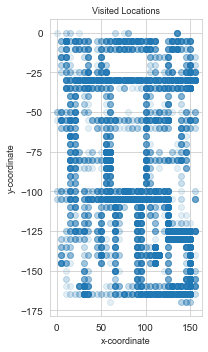

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


pp23/Visuals


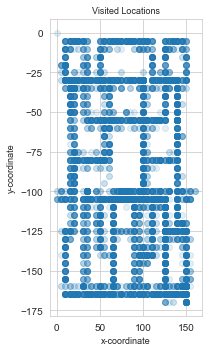

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


Fear2/Visuals


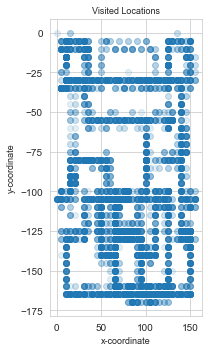

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


fear18/Visuals


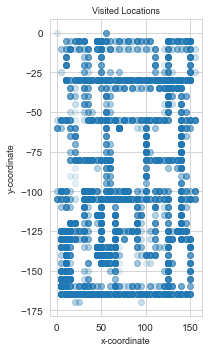

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


NmlOnly3/Visuals


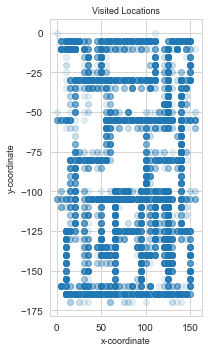

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


NmlOnly21/Visuals


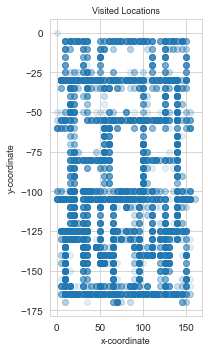

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


std300/Visuals


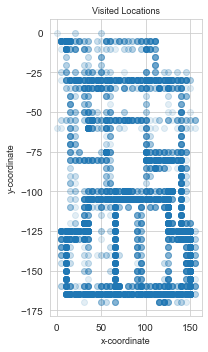

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


Std2/Visuals


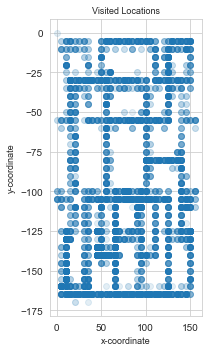

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


Std23/Visuals


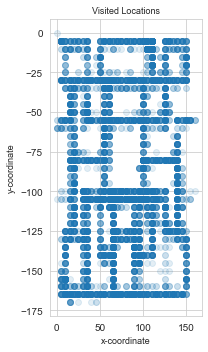

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


std23_2/Visuals


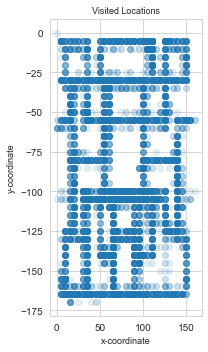

In [15]:
sns.set_style("whitegrid")
colors = ['red','green','dodgerblue','gold','darkorange','slategrey', 'purple', 'magenta']
colors2 = ['magenta', 'purple', 'slategrey','dodgerblue','yellow','orange','red','green']
for index, aNum in enumerate(allEvalsDF.agentNum.unique()):
    plt.figure(figsize=fgsz)
    agent = allEvalsDF[allEvalsDF['agentNum']== aNum]
    agent['neg_y'] = agent['pacman_coord_y']*(-1)
#     plt.scatter("pacman_coord_x", "neg_y", alpha=0.03, data=agent, c= colors[index],  label ="")
    plt.scatter("pacman_coord_x", "neg_y", alpha=0.12, data=agent, cmap=plt.cm.Spectral,  label ="")
    plt.xlabel('x-coordinate', fontsize=9)
    plt.ylabel('y-coordinate', fontsize=9)
    plt.title('Visited Locations', fontsize=9)
#     plt.title('Visited Locations', fontsize=11)
    plt.tight_layout()

    filename = "Coordinates/"+evalAgents[index]+"PacmanMovement_Summary.png"
    print(agent_files[index])
    tmp_path = os.path.join(workingDir, agent_files[index])
    filepath = os.path.join(tmp_path, filename)
    plt.savefig(filepath, dpi=500, bbox_inches='tight')
    plt.show()

10.0
50.0
100.0
200.0
210.0
250.0
400.0
410.0
pp700/Visuals


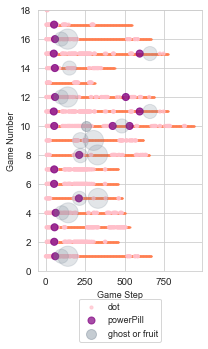

10.0
50.0
100.0
200.0
210.0
400.0
410.0
810.0
pp23/Visuals


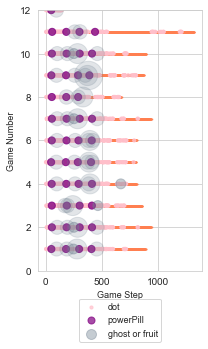

10.0
50.0
100.0
110.0
200.0
210.0
400.0
Fear2/Visuals


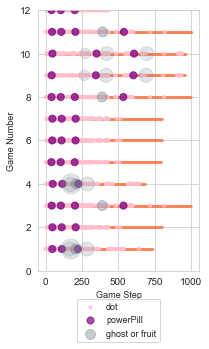

10.0
50.0
100.0
200.0
210.0
400.0
fear18/Visuals


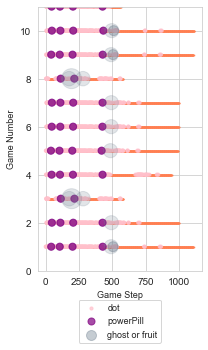

10.0
50.0
100.0
110.0
200.0
210.0
400.0
410.0
NmlOnly3/Visuals


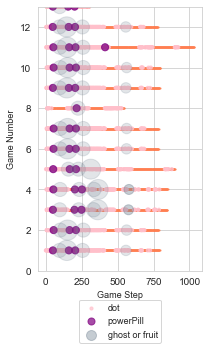

10.0
50.0
100.0
200.0
210.0
400.0
410.0
NmlOnly21/Visuals


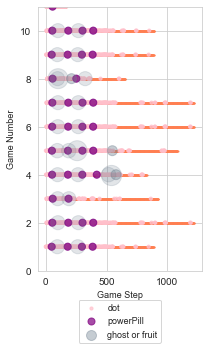

10.0
50.0
100.0
110.0
200.0
210.0
400.0
410.0
std300/Visuals


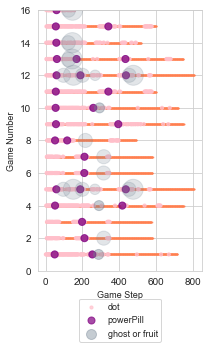

10.0
50.0
100.0
200.0
210.0
400.0
410.0
800.0
Std2/Visuals


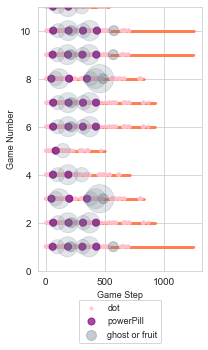

10.0
50.0
100.0
110.0
200.0
210.0
250.0
400.0
410.0
800.0
Std23/Visuals


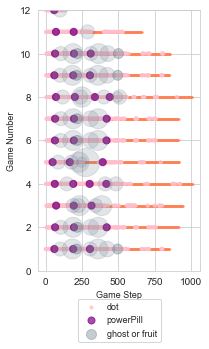

10.0
50.0
100.0
110.0
200.0
210.0
250.0
400.0
410.0
800.0
std23_2/Visuals


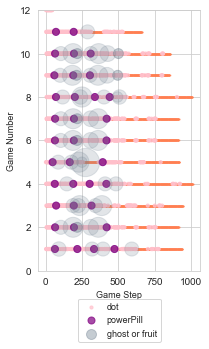

In [17]:
colors = ['red','green','dodgerblue','gold','darkorange','slategrey', 'purple', 'magenta']
colors2 = ['pink', 'purple', 'slategrey','slategrey','slategrey','slategrey','slategrey','slategrey', 'slategrey','slategrey','slategrey','slategrey','slategrey','slategrey', 'slategrey','slategrey','slategrey','slategrey','slategrey','slategrey', 'slategrey','slategrey','slategrey','slategrey','slategrey','slategrey']

rewards = ["dot", "powerPill", "ghost or fruit"]

for index, aNum in enumerate(allEvalsDF.agentNum.unique()):
    plt.figure(figsize=fgsz)
    agent = allEvalsDF[allEvalsDF['agentNum']== aNum]
    plt.scatter("epoch_step","epoch",c="coral",s=1,alpha=0.5,data=agent[agent['reward']<10], label ="")
    temp = agent[agent['reward']>=10]
    for indexR, rewAmnt in enumerate(sorted(temp.reward.unique())):
        print(rewAmnt)
        if indexR < 2:
            plt.scatter("epoch_step","epoch",s="reward",c=colors2[indexR],data=temp[temp['reward']==rewAmnt], alpha=0.7, label=rewards[indexR])
        if indexR == 2:
            plt.scatter("epoch_step","epoch",s="reward",c=colors2[indexR],data=temp[temp['reward']==rewAmnt], alpha=0.4, label=rewards[indexR])
        else:
            plt.scatter("epoch_step","epoch",s="reward",c=colors2[indexR],data=temp[temp['reward']==rewAmnt], alpha=0.2, label = "")
    plt.ylabel('Game Number', fontsize=9)
    plt.ylim((0,temp["epoch"].max()))
    plt.xlabel('Game Step', fontsize=9)
    plt.legend(loc="lower center", bbox_to_anchor=(0.5, -0.29), fontsize=9)
    
    plt.tight_layout()

    filename = "Bars/"+evalAgents[index] + "PacmanPoints_Summary.png"
    print(agent_files[index])
    tmp_path = os.path.join(workingDir, agent_files[index])
    filepath = os.path.join(tmp_path, filename)
    plt.savefig(filepath, dpi=300, bbox_inches='tight')
    plt.show()
    

pp700/Visuals
/Volumes/Britt_SSD/ReDoEvals3/pp700/Visuals/LiveVkeyStates_pop700.png


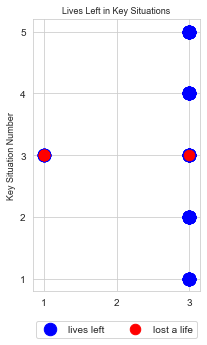

pp23/Visuals
/Volumes/Britt_SSD/ReDoEvals3/pp23/Visuals/LiveVkeyStates_pop23.png


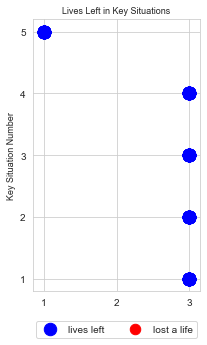

Fear2/Visuals
/Volumes/Britt_SSD/ReDoEvals3/Fear2/Visuals/LiveVkeyStates_fear2.png


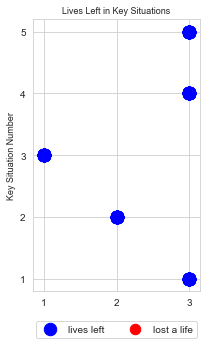

fear18/Visuals
/Volumes/Britt_SSD/ReDoEvals3/fear18/Visuals/LiveVkeyStates_fear18.png


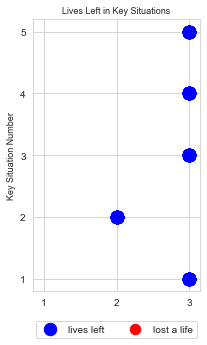

NmlOnly3/Visuals
/Volumes/Britt_SSD/ReDoEvals3/NmlOnly3/Visuals/LiveVkeyStates_nml3.png


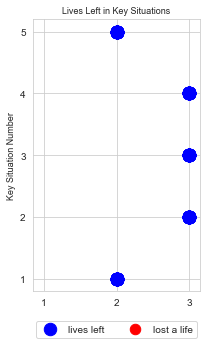

NmlOnly21/Visuals
/Volumes/Britt_SSD/ReDoEvals3/NmlOnly21/Visuals/LiveVkeyStates_nml21.png


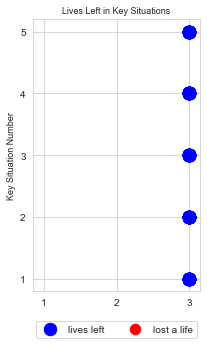

std300/Visuals
/Volumes/Britt_SSD/ReDoEvals3/std300/Visuals/LiveVkeyStates_std300.png


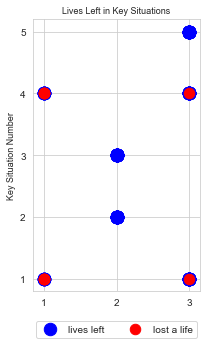

Std2/Visuals
/Volumes/Britt_SSD/ReDoEvals3/Std2/Visuals/LiveVkeyStates_std2.png


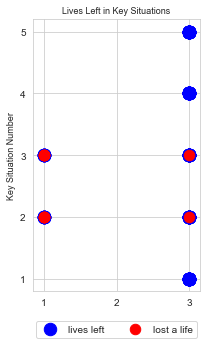

Std23/Visuals
/Volumes/Britt_SSD/ReDoEvals3/Std23/Visuals/LiveVkeyStates_std23.png


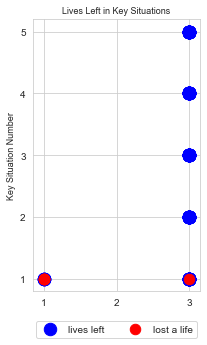

std23_2/Visuals
/Volumes/Britt_SSD/ReDoEvals3/std23_2/Visuals/LiveVkeyStates_std232.png


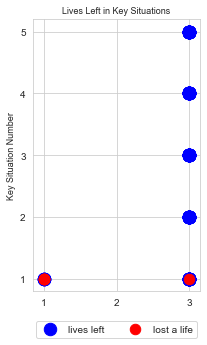

In [16]:
for index, aNum in enumerate(allEvalsDF.agentNum.unique()):
    agent = allEvalsDF[allEvalsDF['agentNum']==aNum]
    agent = agent[agent['keyNum']>0]
    plt.figure(figsize=fgsz)
    plt.yticks([1,2,3,4,5],)
    plt.xticks([1,2,3],)
    
    plt.scatter("lives", "keyNum", s=155, c= 'b', data = agent, label = "lives left")
    plt.scatter("lives", "keyNum", s=110, data = agent[agent['beforeLifeLoss']>0], color = "red", label = "lost a life")
    plt.legend(loc="lower center", ncol=2, bbox_to_anchor=(0.5, -0.19))
    plt.ylabel('Key Situation Number', fontsize=9)
#     plt.title(evalAgents[index] + " Lives Left in Key Situations")
    plt.xlim((0.85,3.15))
    plt.title("Lives Left in Key Situations", fontsize=9)
    
    # call savefig right before show
    filename = "LiveVkeyStates_" + evalAgents[index] + ".png"
    print(agent_files[index])
    tmp_path = os.path.join(workingDir, agent_files[index])
    filepath = os.path.join(tmp_path, filename)
    print(filepath)
    plt.savefig(filepath, dpi=300, bbox_inches='tight')
    plt.show()

pp700/Visuals
/Volumes/Britt_SSD/ReDoEvals3/pp700/Visuals/Horizontal_LiveVkeyStates_pop700.png


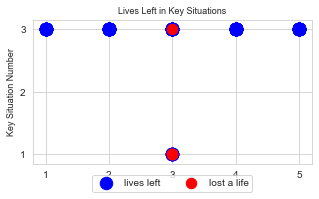

pp23/Visuals
/Volumes/Britt_SSD/ReDoEvals3/pp23/Visuals/Horizontal_LiveVkeyStates_pop23.png


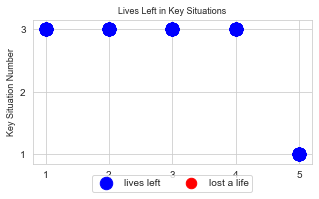

Fear2/Visuals
/Volumes/Britt_SSD/ReDoEvals3/Fear2/Visuals/Horizontal_LiveVkeyStates_fear2.png


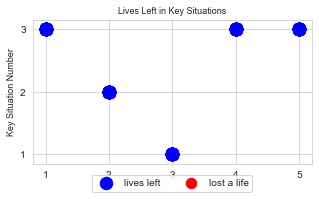

fear18/Visuals
/Volumes/Britt_SSD/ReDoEvals3/fear18/Visuals/Horizontal_LiveVkeyStates_fear18.png


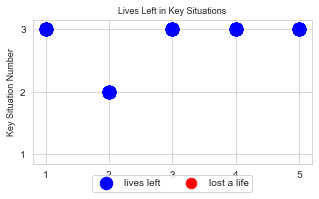

NmlOnly3/Visuals
/Volumes/Britt_SSD/ReDoEvals3/NmlOnly3/Visuals/Horizontal_LiveVkeyStates_nml3.png


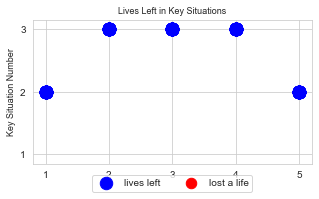

NmlOnly21/Visuals
/Volumes/Britt_SSD/ReDoEvals3/NmlOnly21/Visuals/Horizontal_LiveVkeyStates_nml21.png


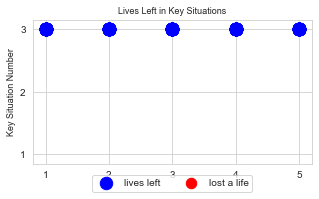

std300/Visuals
/Volumes/Britt_SSD/ReDoEvals3/std300/Visuals/Horizontal_LiveVkeyStates_std300.png


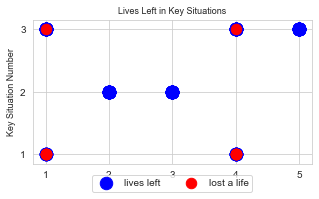

Std2/Visuals
/Volumes/Britt_SSD/ReDoEvals3/Std2/Visuals/Horizontal_LiveVkeyStates_std2.png


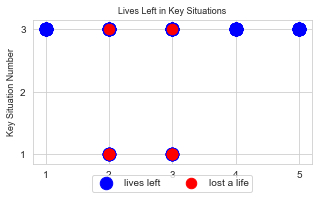

Std23/Visuals
/Volumes/Britt_SSD/ReDoEvals3/Std23/Visuals/Horizontal_LiveVkeyStates_std23.png


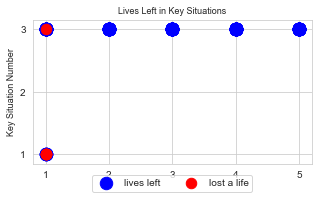

std23_2/Visuals
/Volumes/Britt_SSD/ReDoEvals3/std23_2/Visuals/Horizontal_LiveVkeyStates_std232.png


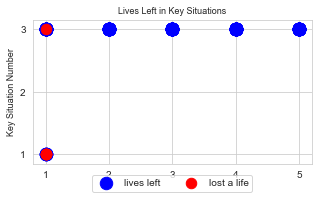

In [17]:
for index, aNum in enumerate(allEvalsDF.agentNum.unique()):
    agent = allEvalsDF[allEvalsDF['agentNum']==aNum]
    agent = agent[agent['keyNum']>0]
    plt.figure(figsize=(5,2.65))
    plt.yticks([1,2,3],)
    plt.xticks([1,2,3,4,5],)
    
    plt.scatter("keyNum", "lives", s=155, c= 'b', data = agent, label = "lives left")
    plt.scatter("keyNum", "lives", s=110, data = agent[agent['beforeLifeLoss']>0], color = "red", label = "lost a life")
    plt.legend(loc="lower center", ncol=2, bbox_to_anchor=(0.5, -0.23))
    plt.ylabel('Key Situation Number', fontsize=9)
#     plt.title(evalAgents[index] + " Lives Left in Key Situations")
    plt.ylim((0.85,3.15))
    plt.title("Lives Left in Key Situations", fontsize=9)
    
    # call savefig right before show
    filename = "Horizontal_LiveVkeyStates_" + evalAgents[index] + ".png"
    print(agent_files[index])
    tmp_path = os.path.join(workingDir, agent_files[index])
    filepath = os.path.join(tmp_path, filename)
    print(filepath)
    plt.savefig(filepath, dpi=300, bbox_inches='tight')
    plt.show()

In [18]:
# for index, agent in enumerate(evalKeysDFsList):
#     plt.figure(figsize=(2.5, 5))
# #     plt.ylim((90,15000))
# #     plt.xlim((0,25000))
    
#     plt.plot("state", "total_reward", c= 'b', data = agent, label = "total points")
#     plt.scatter("state", "total_reward", s=15, data = agent[agent['keyNum']>0], color = "red", label = "key")
#     plt.legend(loc="lower center", bbox_to_anchor=(0.5, -0.3))
#     plt.xlabel('time step')
#     plt.ylabel('total points')
#     column = agent["total_reward"]
#     plt.ylim(0,column.max()+10)
#     plt.title(evalAgents[index] + " Key States in Total Reward")
# #     plt.title("Lives Left in Key Situations")
    
#     # call savefig right before show
#     filename = "KeyStatesOnTotalReward_" + evalAgents[index] + ".png"
#     plt.savefig(filename, dpi=300, bbox_inches='tight')
#     plt.show()

In [19]:
for index, aNum in enumerate(allEvalsDF.agentNum.unique()):   
    temp = allEvalsDF[allEvalsDF['agentNum']==aNum]
    print("Temp: " + str(temp.agentNum.unique()))
    temp2 = temp[temp['keyNum']>0]
    print("Key States in Temp: " + str(temp2.keyNum.unique()))
    temp3 = temp2[temp2['beforeLifeLoss']==1]
    print(temp3["keyNum"])
    

Temp: [0.]
Key States in Temp: [1. 2. 3. 4. 5.]
5779    3.0
5780    3.0
5781    3.0
5782    3.0
5783    3.0
5784    3.0
Name: keyNum, dtype: float64
Temp: [1.]
Key States in Temp: [1. 2. 3. 4. 5.]
Series([], Name: keyNum, dtype: float64)
Temp: [2.]
Key States in Temp: [1. 2. 3. 4. 5.]
Series([], Name: keyNum, dtype: float64)
Temp: [3.]
Key States in Temp: [1. 2. 3. 4. 5.]
Series([], Name: keyNum, dtype: float64)
Temp: [4.]
Key States in Temp: [1. 2. 3. 4. 5.]
Series([], Name: keyNum, dtype: float64)
Temp: [5.]
Key States in Temp: [1. 2. 3. 4. 5.]
Series([], Name: keyNum, dtype: float64)
Temp: [6.]
Key States in Temp: [1. 2. 3. 4. 5.]
60688    1.0
60689    1.0
60690    1.0
60691    1.0
60692    1.0
60693    1.0
61846    4.0
61847    4.0
61848    4.0
61849    4.0
61850    4.0
61851    4.0
Name: keyNum, dtype: float64
Temp: [7.]
Key States in Temp: [1. 2. 3. 4. 5.]
72154    2.0
72155    2.0
72156    2.0
72157    2.0
72158    2.0
72159    2.0
74212    3.0
74213    3.0
74214    3.0
74215   

In [20]:
# colors2 = ['dodgerblue','yellow','red','green','slategrey']
# sns.set_style("whitegrid")
# for index, agent in enumerate(evalDFsList):
#     fig, ((ax1, ax2,ax3, ax4)) = plt.subplots(nrows=1, ncols=4, sharey=True)
#     lim = (-0.5, 301)
    
#     green_diamond = dict(markerfacecolor=colors2[0], marker='o')
#     ax1.boxplot("action 1 episode sum", data=agent, notch=True, flierprops=green_diamond)
#     ax1.tick_params(
#         axis='x',          # changes apply to the x-axis
#         which='both',      # both major and minor ticks are affected
#         bottom=False,      # ticks along the bottom edge are off
#         top=False,         # ticks along the top edge are off
#         labelbottom=False) # labels along the bottom edge are off
#     ax1.set_ylim(lim)
#     ax1.set_xlabel(action_names[0])
    
#     green_diamond = dict(markerfacecolor=colors2[1], marker='o')
#     ax2.boxplot("action 2 episode sum", data=agent, notch=True, flierprops=green_diamond)
#     ax2.tick_params(
#         axis='x',          # changes apply to the x-axis
#         which='both',      # both major and minor ticks are affected
#         bottom=False,      # ticks along the bottom edge are off
#         top=False,         # ticks along the top edge are off
#         labelbottom=False) # labels along the bottom edge are off
#     ax2.set_ylim(lim)
#     ax2.set_xlabel(action_names[1])
    
#     green_diamond = dict(markerfacecolor=colors2[2], marker='o')
#     ax3.boxplot("action 3 episode sum", data=agent, notch=True, flierprops=green_diamond)
#     ax3.tick_params(
#         axis='x',          # changes apply to the x-axis
#         which='both',      # both major and minor ticks are affected
#         bottom=False,      # ticks along the bottom edge are off
#         top=False,         # ticks along the top edge are off
#         labelbottom=False) # labels along the bottom edge are off
#     ax3.set_ylim(lim)
#     ax3.set_xlabel(action_names[2])
    
#     green_diamond = dict(markerfacecolor=colors2[3], marker='o')
#     ax4.boxplot("action 4 episode sum", data=agent, notch=True, flierprops=green_diamond)
#     ax4.tick_params(
#         axis='x',          # changes apply to the x-axis
#         which='both',      # both major and minor ticks are affected
#         bottom=False,      # ticks along the bottom edge are off
#         top=False,         # ticks along the top edge are off
#         labelbottom=False) # labels along the bottom edge are off
#     ax4.set_ylim(lim)
#     ax4.set_xlabel(action_names[3])
    
    
#     plt.suptitle("Distribution of Actions over Lives for " + evalAgents[index])
    
#     plt.tight_layout()
    
# #     filename = "DistributionActionsLives" + evalAgents[index] + ".png"
# #     filepath = os.path.join(workingDir, filename)
    
# #     plt.savefig(filepath, dpi=300, bbox_inches='tight')
#     plt.show()
    

In [22]:
# for agent_index, agNum in enumerate(temp2.agentNum.unique()):
#     filename = "ToGhosts/" + evalAgents[agent_index] 
#     filepath = os.path.join(workingDir, filename)
#     os.mkdir(filepath)

In [ ]:
ofInterest = ['to_red_ghost','to_orange_ghost','to_blue_ghost','to_pink_ghost']
interestNames = ["To Red", "To Orange", "To Blue", "To Pink"]
temp2 = allEvalsDF[allEvalsDF['beforeLifeLoss']>0]

for agent_index, agNum in enumerate(temp2.agentNum.unique()):
    print(evalAgents[agent_index])
    for index, item in enumerate(ofInterest):
        plt.figure(figsize=fgsz)
        
        temp5 = allEvalsDF
        temp5['neg_y'] = allEvalsDF['pacman_coord_y']*(-1)
        ax = sns.scatterplot(allEvalsDF["pacman_coord_x"], temp5['neg_y'], color = 'lightgray', legend = False,
                            size = allEvalsDF["reward"])
        
        temp = temp2[temp2['agentNum']==agNum]
        x = temp[[item]].values.astype(float)
        # Create a minimum and maximum processor object
        min_max_scaler = preprocessing.MinMaxScaler()

        # Create an object to transform the data to fit minmax processor
        x_scaled = min_max_scaler.fit_transform(x)

        # Run the normalizer on the dataframe
        temp["norm_red"] = pd.DataFrame(x_scaled)

        temp['neg_y'] = temp['pacman_coord_y']*(-1)
        
        g=sns.scatterplot("pacman_coord_x", "neg_y", hue = item, palette="seismic_r", legend = False,
                            s=500, alpha=0.25, data=temp, ax=ax)
        g.set(xlabel=None)
        g.set(xticklabels=[])
        g.set(ylabel=None)
        g.set(yticklabels=[])

        norm = plt.Normalize(temp['norm_red'].min(), temp['norm_red'].max())
        sm = plt.cm.ScalarMappable(cmap="seismic_r", norm=norm)
        sm.set_array([])

        # Remove the legend and add a colorbar
#         navy_patch = mpatches.Patch(color='steelblue', label='Further')
#         red_patch = mpatches.Patch(color='firebrick', label='Closer')
#         plt.legend(handles=[navy_patch, red_patch], ncol=2, loc="lower center", bbox_to_anchor=(0.5, -0.13), fontsize=9)
        cbar = ax.figure.colorbar(sm, shrink=0.5, ticks=[-0.1,0,0.1])
        cbar.ax.set_yticklabels(['Closer', 'Neutral', 'Further'])

        plt.title("Distance " + interestNames[-index] + "\nGhost When Life Lost", fontsize=9)
        ax.set(xlabel='', ylabel='')

        filename = "ToGhosts/" + evalAgents[agent_index] + item + "B4Die.png"
        print(agent_files[agent_index])
        tmp_path = os.path.join(workingDir, agent_files[agent_index])
        filepath = os.path.join(tmp_path, filename)
        print(filepath)
        plt.savefig(filepath, dpi=300, bbox_inches='tight')
        plt.show()


In [ ]:
# ofInterest = ['to_red_ghost','to_orange_ghost','to_blue_ghost','to_pink_ghost']
# sns.set_style("whitegrid")
# temp = allEvalsDF[allEvalsDF['beforeLifeLoss']>0]
# fig, axs = plt.subplots(nrows=1, ncols=4, sharey=True, sharex=True, figsize=(15,5))
# axs = axs.ravel()

# for index, item in enumerate(ofInterest):
#     print(index)
#     x = temp[[item]].values.astype(float)

#     # Create a minimum and maximum processor object
#     min_max_scaler = preprocessing.MinMaxScaler()

#     # Create an object to transform the data to fit minmax processor
#     x_scaled = min_max_scaler.fit_transform(x)

#     # Run the normalizer on the dataframe
#     temp["norm_red"] = pd.DataFrame(x_scaled)

#     temp['neg_y'] = temp['pacman_coord_y']*(-1)
#     sns.scatterplot("pacman_coord_x", "neg_y", hue = item, palette="Spectral", legend = False,
#                         size ="total_reward", alpha=0.8, data=temp, ax = axs[index])
#     norm = plt.Normalize(temp['norm_red'].min(), temp['norm_red'].max())
#     if (index == 3):
#         sm = plt.cm.ScalarMappable(cmap="Spectral", norm=norm)
#         sm.set_array([])

#         # Remove the legend and add a colorbar
#         axs[-index].figure.colorbar(sm)

#     axs[-index].set_title(ofInterest[index])
# #     axs[-index].set(xlabel='Distance to Upper Left', ylabel='Distance to Lower Right')

# #     filename = item + "B4Die.png"
# #     filepath = os.path.join(workingDir, filename)

# #     plt.savefig(filepath, dpi=300, bbox_inches='tight')
# #     plt.show()



In [ ]:
allEvalsDF.columns


In [ ]:
for index, num in enumerate(allEvalsDF.agentNum.unique()):
    df = allEvalsDF[allEvalsDF['agentNum']==num]
    
    plt.figure(figsize=fgsz)
    
    # Make action Distributions
    action_names = ['UP', 'RIGHT', 'LEFT', 'DOWN']
    def label_race (row):
       if row['action'] == 1 :
          return action_names[0]
       if row['action'] == 2 :
          return action_names[1]
       if row['action'] == 3:
          return action_names[2]
       if row['action']  == 4:
          return action_names[3]
       return action_names[3]

    df['action_name'] = df.apply (lambda row: label_race(row), axis=1)

    # Can I get the sums of each action for each epoch?
    actions_df = pd.DataFrame(df.pivot_table(index='epoch',columns='action_name',aggfunc=sum))
    
    action_subset = pd.DataFrame(actions_df['action'])
    action_subset['epoch'] = range(1, len(action_subset) + 1)
    action_subset.set_index('epoch',drop=False,inplace=True)
    
    actions_only = action_subset.drop(['epoch'], axis=1)

#     plt.stackplot(range(1,len(actions_only)+1), actions_only['DOWN'], actions_only['LEFT'], actions_only['RIGHT'], actions_only['UP'], labels = ['DOWN', 'LEFT', 'RIGHT', 'UP'])

#     plt.title('Actions Per Life')
#     plt.xlabel('Life')
#     plt.ylabel('Number of Actions Taken in Life')
#     plt.legend(loc="lower left")
    
    data_perc = actions_only.divide(actions_only.sum(axis=1), axis=0)

    plt.stackplot(range(1,len(data_perc)+1), data_perc['DOWN'], 
                  data_perc['LEFT'], 
                  data_perc['RIGHT'], 
                  data_perc['UP'], 
                  labels = ['DOWN', 'LEFT', 'RIGHT', 'UP'])
    plt.title('Actions Per Game', fontsize=9)
#     plt.title(evalAgents[index] + ' Actions Per Game')
    plt.ylim((0,1))
#     plt.xlabel('Life')
    column = df['epoch']
    plt.xlim(column.min(),column.max()-1)
    plt.ylabel('Percent of Actions Taken', fontsize=9)
    plt.legend(loc="lower left", fontsize=9)
    filename = evalAgents[index] + "StackedActions.png"
    print(agent_files[index])
    tmp_path = os.path.join(workingDir, agent_files[index])
    filepath = os.path.join(tmp_path, filename)
    print(filepath)
    plt.savefig(filepath, dpi=300, bbox_inches='tight')
    plt.show()

In [ ]:
for index, num in enumerate(allEvalsDF.agentNum.unique()):
    sns.set_style("whitegrid")
    f, (ax1, ax2) = plt.subplots(2, 1, sharey=True, figsize=fgsz)
    
    df = allEvalsDF[allEvalsDF['agentNum']==num]
    
    column = df['epoch']
    plt.ylim(column.min()-1,column.max())
    
    for i in df.lives.unique():
        tmp = df[df['lives']==i]
        print(i)
        string = str(i)
        ax1.scatter("epoch_step", "epoch", data = tmp, label = string)
        ax2.scatter("epoch_reward", "epoch", data = tmp, label = string)
    ax1.tick_params(axis='x', labelsize= 7)
    ax2.tick_params(axis='x', labelsize= 7)
    
    ax1.set_xlabel("Life Length", fontsize = 9)
    ax2.set_xlabel("Life Rewards", fontsize = 9)
    
    plt.legend(loc="lower center", bbox_to_anchor=(0.5, -0.28), ncol = 3, fontsize=9)
    
    plt.subplots_adjust(hspace=0.25)
    
    filename = "Bars/" + evalAgents[index] + "LifeRewardsBars.png"

    tmp_path = os.path.join(workingDir, agent_files[index])
    filepath = os.path.join(tmp_path, filename)

    plt.savefig(filepath, dpi=300)
    plt.show()

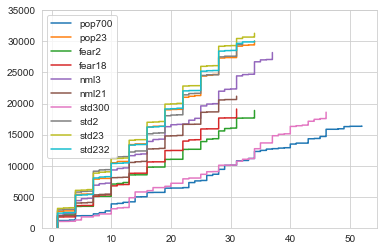

In [23]:
for index, num in enumerate(allEvalsDF.agentNum.unique()):
    df = allEvalsDF[allEvalsDF['agentNum']==num]
    plt.plot("episode", "total_reward", data = df, label = evalAgents[index])
    plt.ylim((0,35000))
    plt.legend(loc="best")
#     plt.title([index])
#     plt.show()

In [25]:
# for agent_index, df in enumerate(evalKeysDFsList):
#     for key_index, key_num in enumerate(df.keyNum.unique()):
#         plt.figure(figsize=(2.5, 5))
#         temp2 = df[df['keyNum']==key_num]
#         temp3 = allEvalsDF
#         temp2['neg_y'] = temp2['pacman_coord_y']*(-1)
#         temp3['neg_y'] = temp3['pacman_coord_y']*(-1)
#         plt.scatter('pacman_coord_x', 'neg_y', c='grey', alpha=0.002, data=temp3)
#         plt.scatter('pacman_coord_x', 'neg_y', c='epoch_step', data=temp2)
#         plt.title("Key: " + str(key_index) + " For " + str(evalAgents[index]))
#         plt.show()

/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:1184: UserWarning: No contour levels were found within the data range.
  **contour_kws,


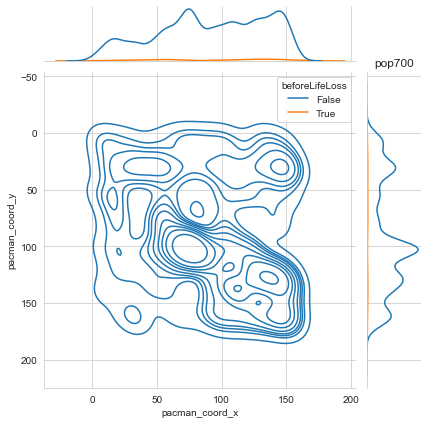

/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:1184: UserWarning: No contour levels were found within the data range.
  **contour_kws,


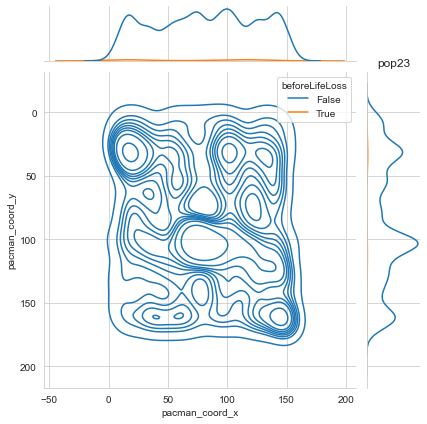

/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:1184: UserWarning: No contour levels were found within the data range.
  **contour_kws,


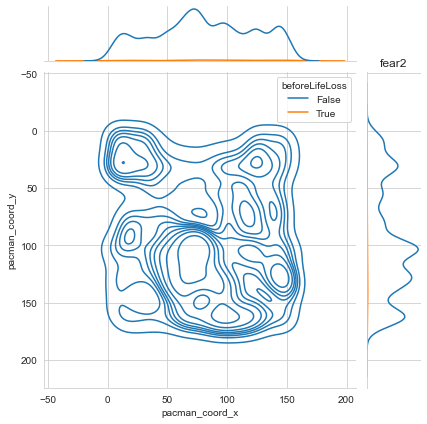

/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:1184: UserWarning: No contour levels were found within the data range.
  **contour_kws,


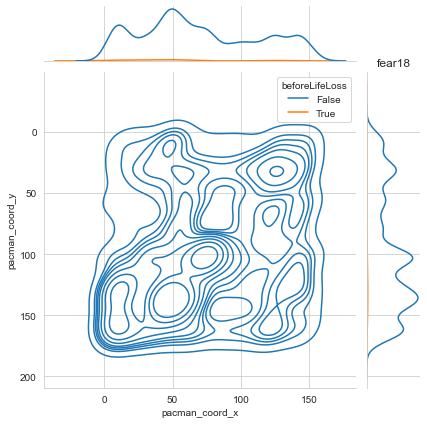

/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:1184: UserWarning: No contour levels were found within the data range.
  **contour_kws,


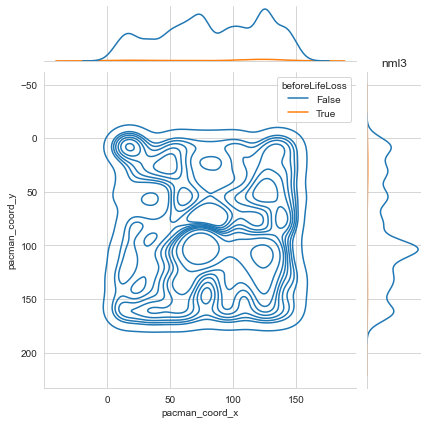

/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:1184: UserWarning: No contour levels were found within the data range.
  **contour_kws,


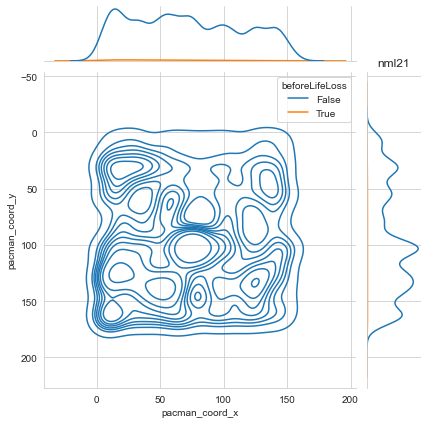

/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:1184: UserWarning: No contour levels were found within the data range.
  **contour_kws,


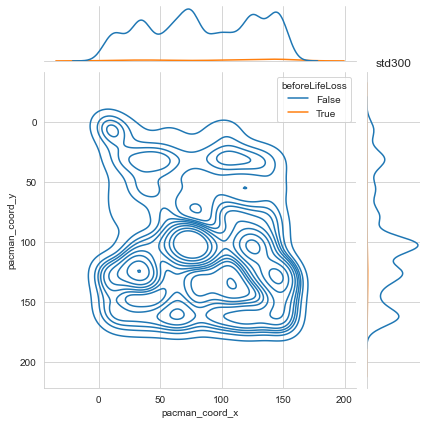

/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:1184: UserWarning: No contour levels were found within the data range.
  **contour_kws,


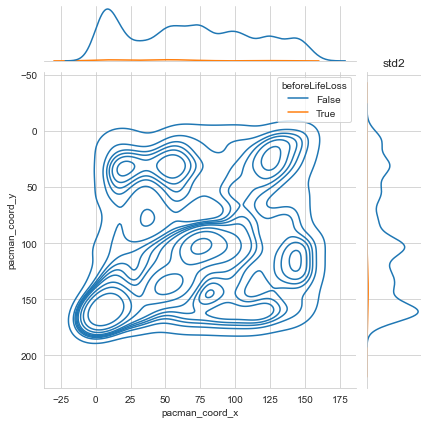

/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:1184: UserWarning: No contour levels were found within the data range.
  **contour_kws,


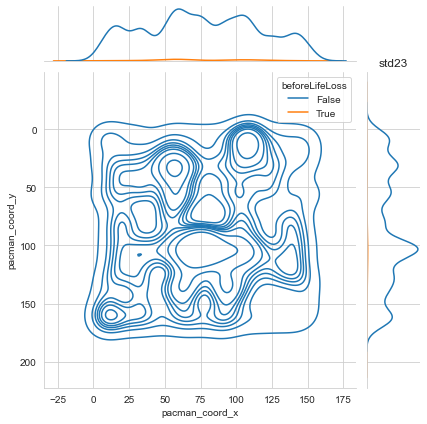

/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:1184: UserWarning: No contour levels were found within the data range.
  **contour_kws,


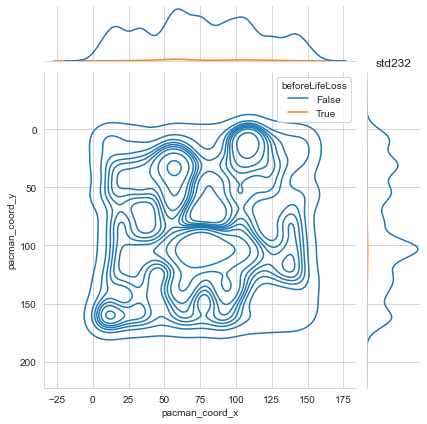

In [26]:
for agent_index, df in enumerate(allEvalsDF.agentNum.unique()):
    temp = allEvalsDF[allEvalsDF['agentNum']==df]
    sns.jointplot(
        data=temp,
        x="pacman_coord_x", y="pacman_coord_y", hue="beforeLifeLoss",
        kind="kde"
    )
    plt.ylim(reversed(plt.ylim()))
    plt.title(evalAgents[agent_index])
    plt.show()

In [27]:
for agent_index, df in enumerate(allEvalsDF.agentNum.unique()):
    temp = allEvalsDF[allEvalsDF['agentNum']==df]
#     temp['neg_y'] = temp['pacman_coord_y']*(-1)
    g = sns.JointGrid(data=temp, x="pacman_coord_x", y="pacman_coord_y", hue="state")
    g.plot_joint(sns.histplot)
    g.plot_marginals(sns.boxplot)
    plt.title(evalAgents[agent_index])
    plt.ylim(reversed(plt.ylim()))
    plt.show()

ValueError: Image size of 427x140045 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 432x432 with 3 Axes>

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7fd1f06fd170> (for post_execute):


KeyboardInterrupt: 

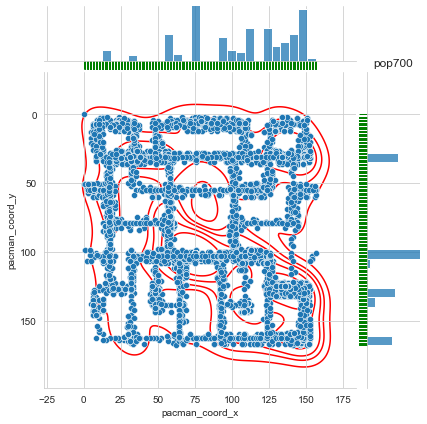

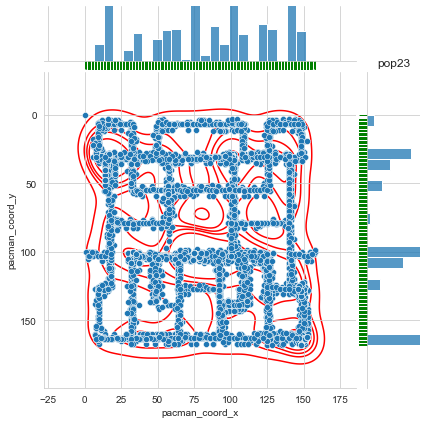

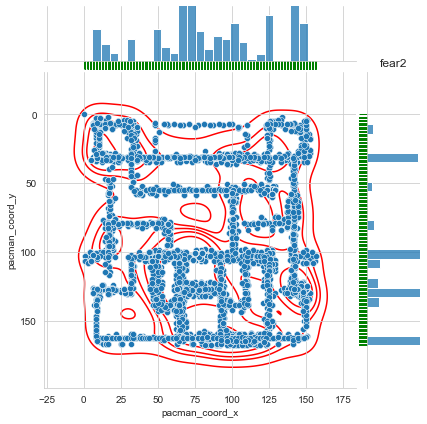

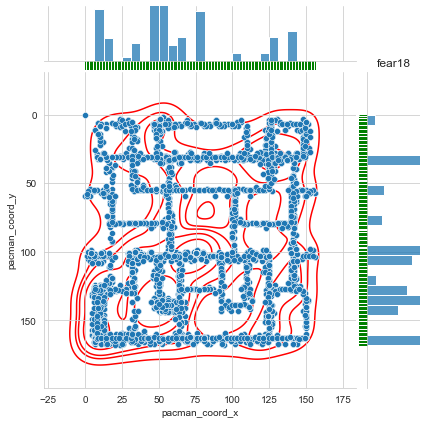

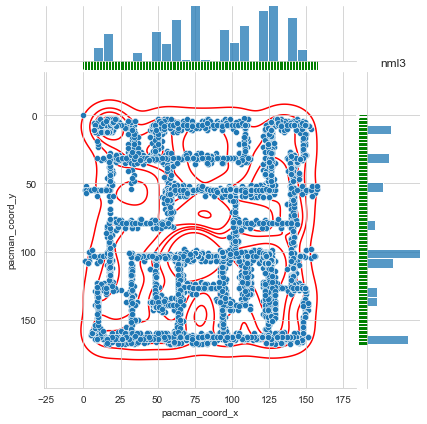

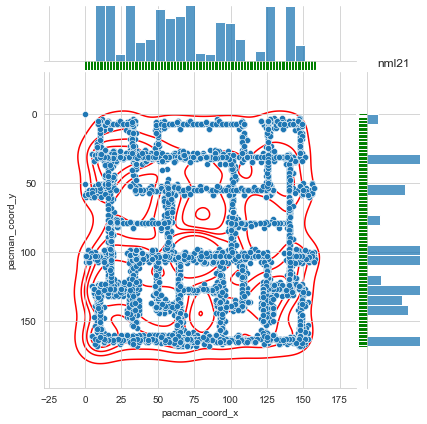

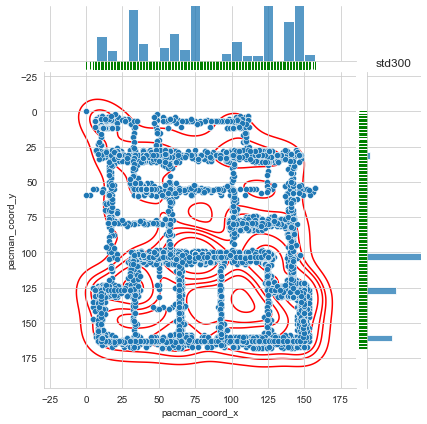

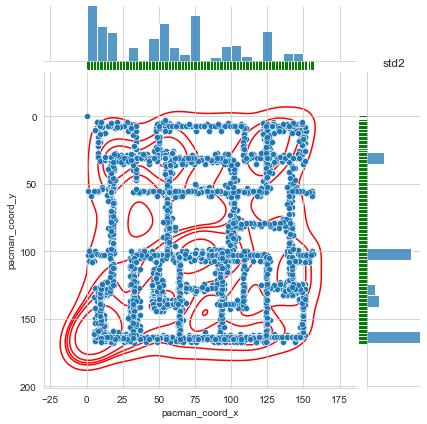

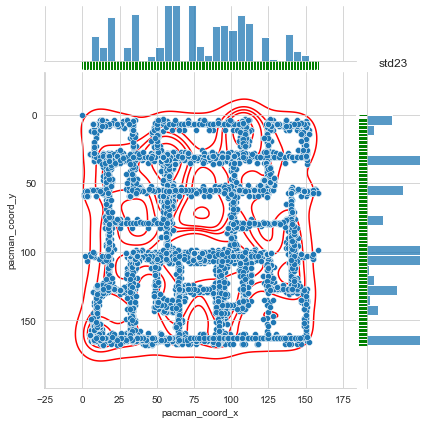

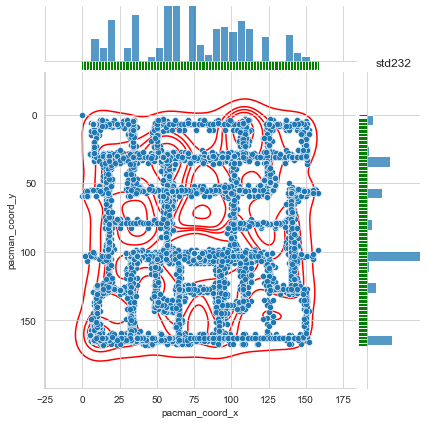

In [28]:
for agent_index, df in enumerate(allEvalsDF.agentNum.unique()):
    temp = allEvalsDF[allEvalsDF['agentNum']==df]
#     temp['neg_y'] = temp['pacman_coord_y']*(-1)
    g = sns.jointplot(data=temp, x="pacman_coord_x", y="pacman_coord_y")
    g.plot_joint(sns.kdeplot, color="r", zorder=0, levels=6)
    g.plot_marginals(sns.rugplot, color="g", height=-.15, clip_on=False)
    plt.ylim(reversed(plt.ylim()))
    plt.title(evalAgents[agent_index])
    plt.show()

In [29]:
# for agent_index, df in enumerate(allEvalsDF.agentNum.unique()):
#     temp = allEvalsDF[allEvalsDF['agentNum']==df]

#     flights = temp.pivot("state", "pacman_coord_y", "pacman_coord_x")
#     ax = sns.heatmap(flights)

In [30]:
# for agent_index, df in enumerate(allEvalsDF.agentNum.unique()):
#     plt.figure(figsize=(3.2, 5))
#     temp = allEvalsDF[allEvalsDF['agentNum']==df]
# #     temp['neg_y'] = temp['pacman_coord_y']*(-1)
#     sns.kdeplot(
#             x=temp['pacman_coord_x'], y=temp['pacman_coord_y'],
#             cmap='viridis', fill=False, thresh=0.05,
#             cut=2, levels=3, cbar=True, cumulative=True
#             )
#     plt.title(evalAgents[agent_index])
#     plt.ylim(reversed(plt.ylim()))
#     plt.show()

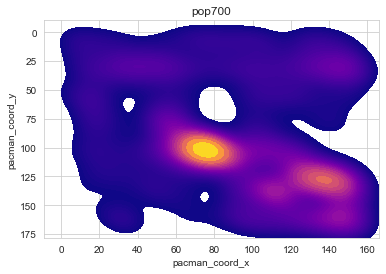

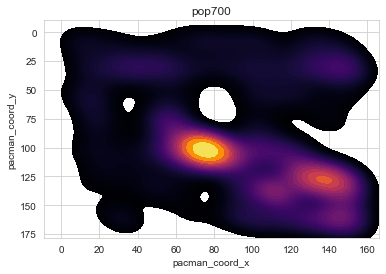

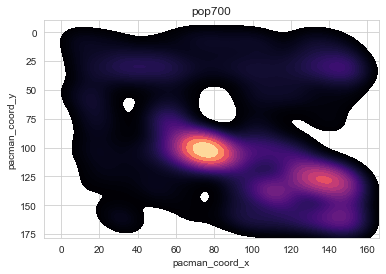

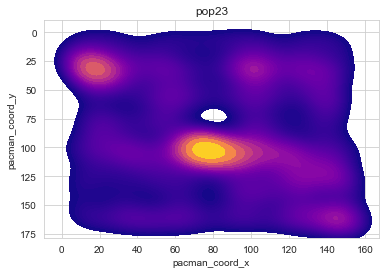

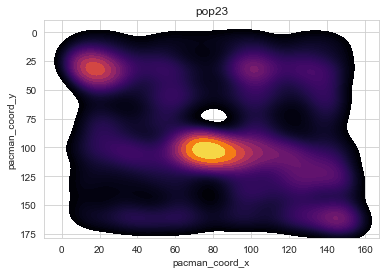

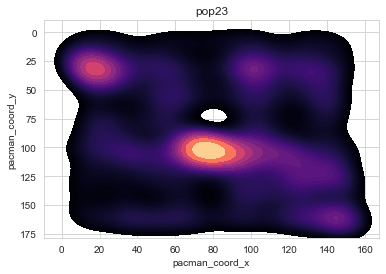

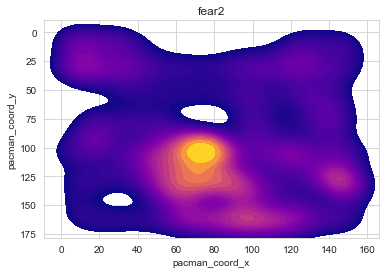

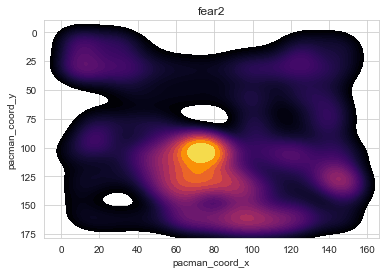

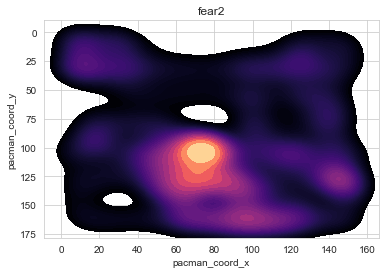

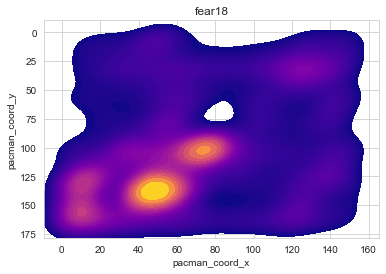

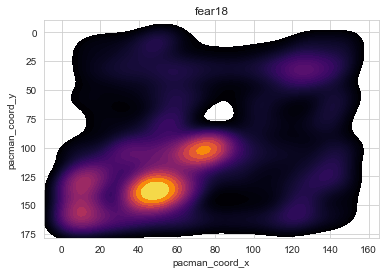

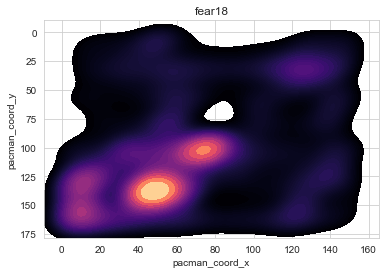

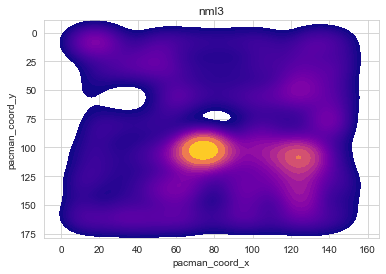

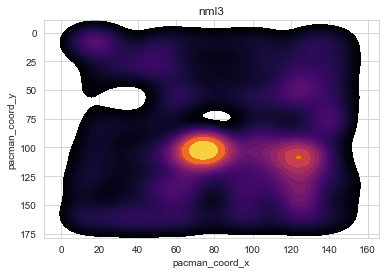

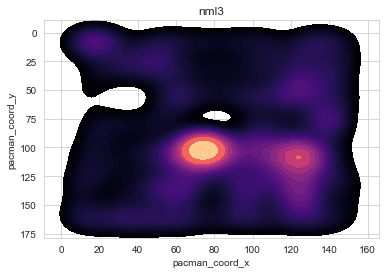

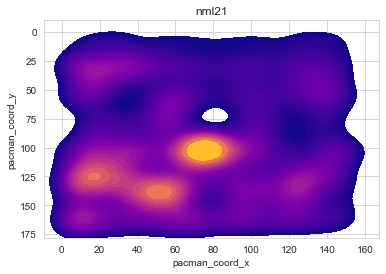

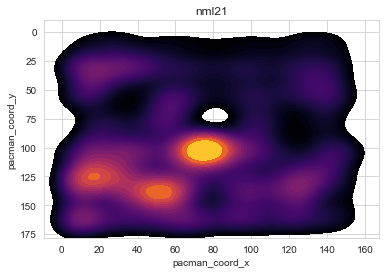

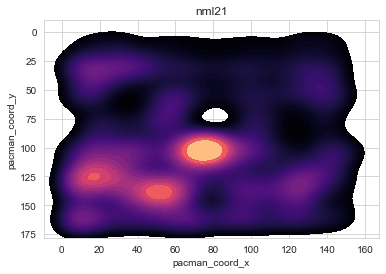

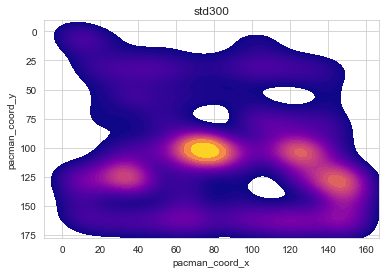

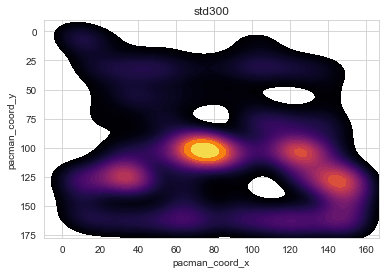

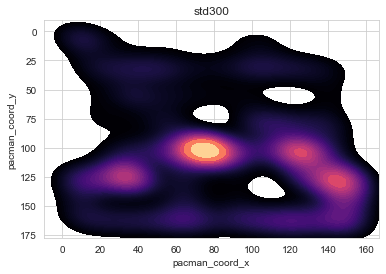

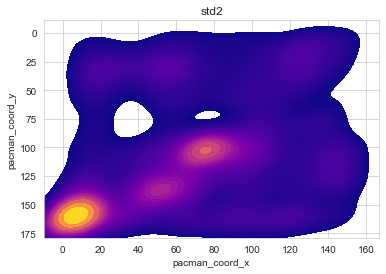

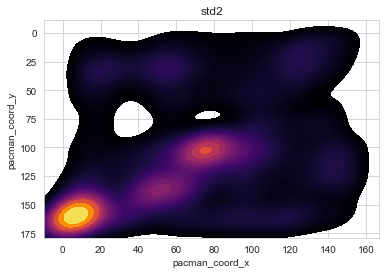

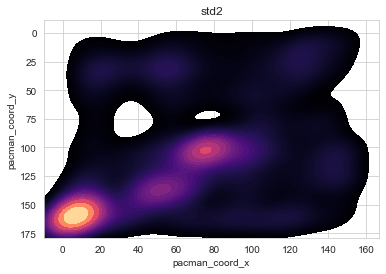

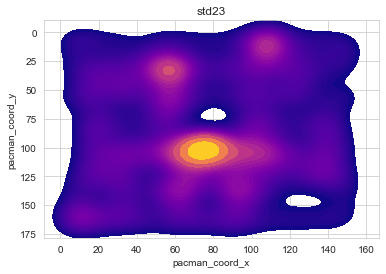

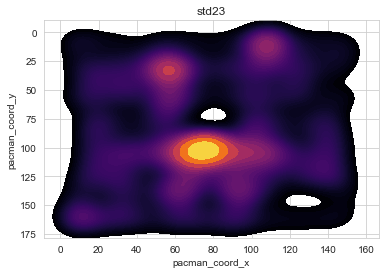

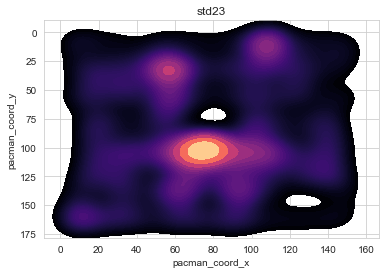

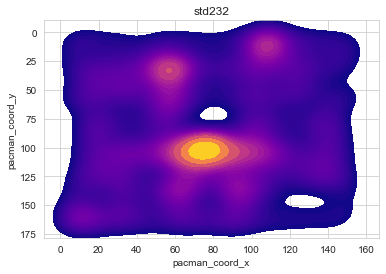

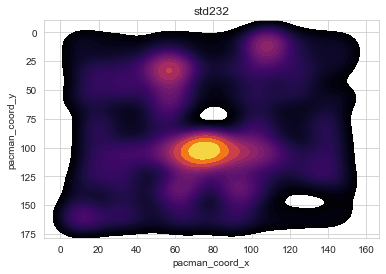

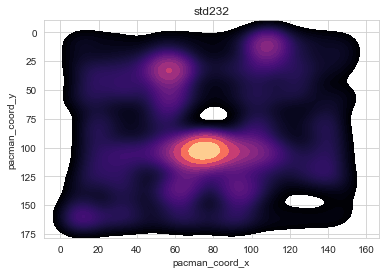

In [31]:
for agent_index, df in enumerate(allEvalsDF.agentNum.unique()):
    temp = allEvalsDF[allEvalsDF['agentNum']==df]
#     temp['neg_y'] = temp['pacman_coord_y']*(-1)
    sns.kdeplot(
            x=temp['pacman_coord_x'], y=temp['pacman_coord_y'],
            cmap='plasma', fill=True,
            cut=1, levels=35
            )
    plt.title(evalAgents[agent_index])
    plt.ylim(reversed(plt.ylim()))
    plt.show()
    
    sns.kdeplot(
            x=temp['pacman_coord_x'], y=temp['pacman_coord_y'],
            cmap='inferno', fill=True,
            cut=1, levels=35
            )
    plt.title(evalAgents[agent_index])
    plt.ylim(reversed(plt.ylim()))
    plt.show()
    
    sns.kdeplot(
            x=temp['pacman_coord_x'], y=temp['pacman_coord_y'],
            cmap='magma', fill=True,
            cut=1, levels=35
            )
    plt.title(evalAgents[agent_index])
    plt.ylim(reversed(plt.ylim()))
    plt.show()

In [ ]:
import math
# https://www.geodose.com/2018/01/creating-heatmap-in-python-from-scratch.html
#DEFINE GRID SIZE AND RADIUS(h)
grid_size=1
h=3

sns.set_style("whitegrid")
colors = ['red','green','dodgerblue','gold','darkorange','slategrey', 'purple', 'magenta']
colors2 = ['magenta', 'purple', 'slategrey','dodgerblue','yellow','orange','red','green']
for index, aNum in enumerate(allEvalsDF.agentNum.unique()):
    plt.figure(figsize=(3.2, 5))
    agent = allEvalsDF[allEvalsDF['agentNum']== aNum]
    agent['neg_y'] = agent['pacman_coord_y']*(-1)
    
    x=agent["pacman_coord_x"]
    y=agent['neg_y']
    #GETTING X,Y MIN AND MAX
    x_min=min(x)
    x_max=max(x)
    y_min=min(y)
    y_max=max(y)

    #CONSTRUCT GRID
    x_grid=np.arange(x_min-h,x_max+h,grid_size)
    y_grid=np.arange(y_min-h,y_max+h,grid_size)
    x_mesh,y_mesh=np.meshgrid(x_grid,y_grid)

    #GRID CENTER POINT
    xc=x_mesh+(grid_size/2)
    yc=y_mesh+(grid_size/2)
    
    #PROCESSING
    intensity_list=[]
    for j in range(len(xc)):
        intensity_row=[]
        for k in range(len(xc[0])):
            kde_value_list=[]
            for i in range(len(x)):
                #CALCULATE DISTANCE
                d=math.sqrt((xc[j][k]-x[i])**2+(yc[j][k]-y[i])**2) 
                if d<=h:
                    dn=d/h
                    p=(15/16)*(1-dn**2)**2
                else:
                    p=0
                kde_value_list.append(p)
            #SUM ALL INTENSITY VALUE
            p_total=sum(kde_value_list)
            intensity_row.append(p_total)
        intensity_list.append(intensity_row)
        
    #HEATMAP OUTPUT    
    intensity=np.array(intensity_list)
    plt.pcolormesh(x_mesh,y_mesh,intensity)
    plt.plot(x,y,'ro')
    plt.colorbar()
    plt.show()


/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [ ]:
import cycler
import matplotlib as mpl

for index, aNum in enumerate(allEvalsDF.agentNum.unique()):
    plt.figure(figsize=(3.2, 5))
    agent = allEvalsDF[allEvalsDF['agentNum']== aNum]
    
    temp = pd.DataFrame()
    temp = agent.groupby( [ "pacman_coord_x", "pacman_coord_y"] ).size().to_frame(name="count").reset_index()
    
    pd.crosstab(agent.pacman_coord_x,agent.pacman_coord_y).replace(0,np.nan).stack().reset_index().rename(columns={0:'visited'})
    visits = agent.index.tolist()
    
    # Change color cycle specifically for `ax2`
    n = len(temp)
    color = plt.cm.magma(np.linspace(0, 1,n))
    mpl.rcParams['axes.prop_cycle'] = cycler.cycler('color', color)
    
    plt.scatter(temp['pacman_coord_x'], temp['pacman_coord_y'], c=temp['count'])
#     print(temp.head(10))

    

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from matplotlib import cm

for index, aNum in enumerate(allEvalsDF.agentNum.unique()):
    plt.figure(figsize=(3.2, 5))
    agent = allEvalsDF[allEvalsDF['agentNum']== aNum]
    agent['neg_y'] = agent['pacman_coord_y']*(-1)
    
    temp = pd.DataFrame()
    temp = agent.groupby( [ "pacman_coord_x", "neg_y"] ).size().to_frame(name="count").reset_index()
    
    # Generate fake data
    x=temp["pacman_coord_x"]
    y=temp['neg_y']
    z=temp['count']
#     print(z.max())

#     plt.hist2d(x,y,(200,200), weights=z, cmap=cm.Purples, cmin=0, cmax=40)
#     plt.hist2d(x,y,(300,300), weights=z, cmap=cm.Purples, density=True)
    h, x, y, p = plt.hist2d(x,y,(55,55), weights=z, cmap=plt.cm.get_cmap('viridis',len(temp)), cmin=1, cmax=z.max()-1)
    plt.title(evalAgents[index])
    plt.show()

In [ ]:
print(plt.cm.cmap_d.keys())

In [ ]:
for index, aNum in enumerate(allEvalsDF.agentNum.unique()):
    plt.figure(figsize=(3.2, 5))
    agent = allEvalsDF[allEvalsDF['agentNum']== aNum]
    agent['neg_y'] = agent['pacman_coord_y']*(-1)
    
    temp = pd.DataFrame()
    temp = agent.groupby( [ "pacman_coord_x", "neg_y"] ).size().to_frame(name="count").reset_index()
    
    # Generate fake data
    x=temp["pacman_coord_x"]
    y=temp['neg_y']
    z=temp['count']*10

    # make sure to set x, y, and weights here
    heatmap, _, _ = np.histogram2d(x, y, weights=z)

    plt.clf()
    plt.imshow(heatmap)
    plt.show()

In [ ]:
for agent_index, df in enumerate(allEvalsDF.agentNum.unique()):
    agent = allEvalsDF[allEvalsDF['agentNum']==df]
    
    temp = pd.DataFrame()
    temp = agent.groupby( [ "pacman_coord_x", "pacman_coord_y"] ).size().to_frame(name="count").reset_index()
    
    # Generate fake data
    x=temp["pacman_coord_x"]
    y=temp['pacman_coord_y']
    z=temp['count']
    
    sns.kdeplot(
            x=temp['pacman_coord_x'], y=temp['pacman_coord_y'], weights=z,
            cmap='plasma', fill=True,
            cut=1, levels=35
            )
    plt.title(evalAgents[agent_index])
    plt.ylim(reversed(plt.ylim()))
    plt.show()

In [ ]:
for agent_index, df in enumerate(allEvalsDF.agentNum.unique()):
    temp = allEvalsDF[allEvalsDF['agentNum']==df]
#     temp['neg_y'] = temp['pacman_coord_y']*(-1)
    g = sns.jointplot(data=temp, x="pacman_coord_x", y="pacman_coord_y")
    g.plot_joint(sns.kdeplot, levels=15)
    g.plot_marginals(sns.rugplot, height=-.15, clip_on=False)
    plt.ylim(reversed(plt.ylim()))
    plt.title(evalAgents[agent_index])
    plt.show()

In [ ]:
for agent_index, df in enumerate(allEvalsDF.agentNum.unique()):
    agent = allEvalsDF[allEvalsDF['agentNum']==df]
    
    temp = pd.DataFrame()
    temp = agent.groupby( [ "pacman_coord_x", "pacman_coord_y"] ).size().to_frame(name="count").reset_index()
    
    # Generate fake data
    x=temp["pacman_coord_x"]
    y=temp['pacman_coord_y']
    z=temp['count']
    
    g = sns.jointplot(data=agent, x="pacman_coord_x", y="pacman_coord_y")
    g.plot_marginals(sns.distplot, kde = True)
    plt.title("Agent")
    plt.show()
    
    g = sns.jointplot(data=temp, x="pacman_coord_x", y="pacman_coord_y")
    plt.title("Temp")
    plt.show()

In [ ]:
for agent_index, df in enumerate(allEvalsDF.agentNum.unique()):
    agent = allEvalsDF[allEvalsDF['agentNum']==df]
    
    agent = allEvalsDF[allEvalsDF['agentNum']==df]
    
    temp = pd.DataFrame()
    temp = agent.groupby( [ "pacman_coord_x", "pacman_coord_y"] ).size().to_frame(name="count").reset_index()
    
    # Generate fake data
    x=temp["pacman_coord_x"]
    y=temp['pacman_coord_y']
    z=temp['count']
    
    g = sns.JointGrid(data=temp, x="pacman_coord_x", y="pacman_coord_y")
    g.plot_joint(sns.scatterplot, s=10, alpha=1, hue=temp['count'], hue_norm=(0,z.max()/2), palette='viridis',
                legend=False)
    g.plot_marginals(sns.histplot, kde=True, fill=True)

pp700/Visuals
/Volumes/Britt_SSD/ReDoEvals3/pp700/Visuals/Coordinates/DistributionOverCoordinatespop700.png


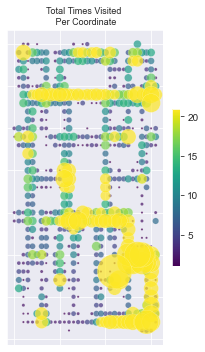

pp23/Visuals
/Volumes/Britt_SSD/ReDoEvals3/pp23/Visuals/Coordinates/DistributionOverCoordinatespop23.png


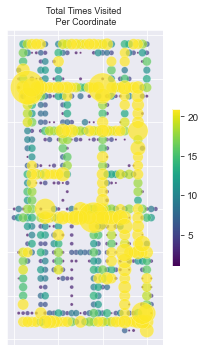

Fear2/Visuals
/Volumes/Britt_SSD/ReDoEvals3/Fear2/Visuals/Coordinates/DistributionOverCoordinatesfear2.png


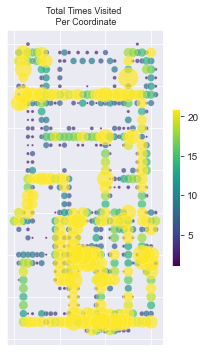

fear18/Visuals
/Volumes/Britt_SSD/ReDoEvals3/fear18/Visuals/Coordinates/DistributionOverCoordinatesfear18.png


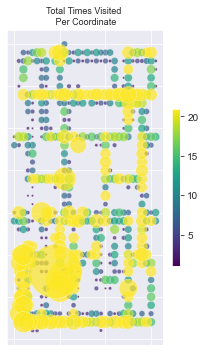

NmlOnly3/Visuals
/Volumes/Britt_SSD/ReDoEvals3/NmlOnly3/Visuals/Coordinates/DistributionOverCoordinatesnml3.png


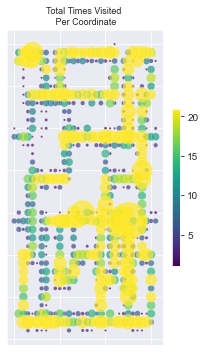

NmlOnly21/Visuals
/Volumes/Britt_SSD/ReDoEvals3/NmlOnly21/Visuals/Coordinates/DistributionOverCoordinatesnml21.png


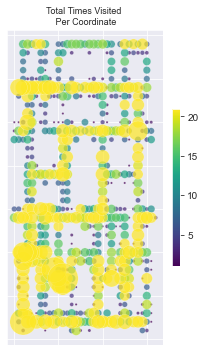

std300/Visuals
/Volumes/Britt_SSD/ReDoEvals3/std300/Visuals/Coordinates/DistributionOverCoordinatesstd300.png


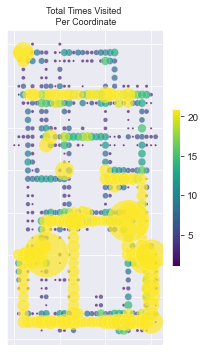

Std2/Visuals
/Volumes/Britt_SSD/ReDoEvals3/Std2/Visuals/Coordinates/DistributionOverCoordinatesstd2.png


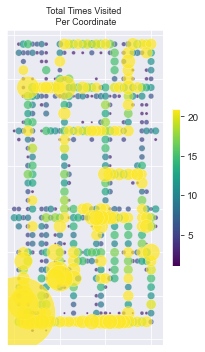

Std23/Visuals
/Volumes/Britt_SSD/ReDoEvals3/Std23/Visuals/Coordinates/DistributionOverCoordinatesstd23.png


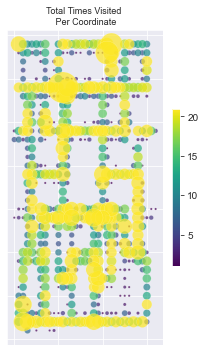

std23_2/Visuals
/Volumes/Britt_SSD/ReDoEvals3/std23_2/Visuals/Coordinates/DistributionOverCoordinatesstd232.png


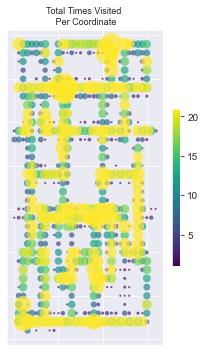

In [14]:
sns.set_style(style="darkgrid")

# find range for all visits
temp1 = allEvalsDF
#lump together close coordinates
base = 5
temp1['pacman_coord_x'] = temp1['pacman_coord_x'].apply(lambda x: 
                                                        int(base * round(float(x)/base)))
temp1['pacman_coord_y'] = temp1['pacman_coord_y'].apply(lambda x: 
                                                        int(base * round(float(x)/base)))
temp2 = pd.DataFrame()
# group and count number of times visited
temp2 = agent.groupby( [ "pacman_coord_x", "pacman_coord_y"] ).size().to_frame(name="count").reset_index()
temp2.sort_values('count', ascending=True, inplace=True)
z=temp2['count']

norm = plt.Normalize(temp2['count'].min(), temp2['count'].max()/8)
sm = plt.cm.ScalarMappable(cmap="viridis", norm=norm)
sm.set_array([])

for agent_index, df in enumerate(allEvalsDF.agentNum.unique()):
    agent = allEvalsDF[allEvalsDF['agentNum']==df]
    
    # drop the first 250 steps for lives 2 & 3
    agent = agent.loc[(agent['episode_step']>30)]
    
    #lump together close coordinates
    base = 5
    agent['pacman_coord_x'] = agent['pacman_coord_x'].apply(lambda x: 
                                                            int(base * round(float(x)/base)))
    agent['pacman_coord_y'] = agent['pacman_coord_y'].apply(lambda x: 
                                                            int(base * round(float(x)/base)))
    temp = pd.DataFrame()
    # group and count number of times visited
    temp = agent.groupby( [ "pacman_coord_x", "pacman_coord_y"] ).size().to_frame(name="count").reset_index()
    
    # Generate fake data
    x=temp["pacman_coord_x"]
    y=temp['pacman_coord_y']
    temp.sort_values('count', ascending=True, inplace=True)
    z=temp['count']
    plt.figure(figsize=fgsz)
#     temp.sort_values('count')
#     norm = plt.Normalize(temp['count'].min(), temp['count'].max()/10)
#     sm = plt.cm.ScalarMappable(cmap="viridis", norm=norm)
#     sm.set_array([])

    g = sns.scatterplot(data=temp, x="pacman_coord_x", y="pacman_coord_y", s=temp['count']*5, 
                        alpha=0.7, hue=temp['count'], 
                        hue_norm=(temp2['count'].min(), temp2['count'].max()/8), 
                        palette='viridis', legend=False)
    
    plt.ylim(reversed(plt.ylim()))
    plt.title("Total Times Visited \n Per Coordinate", fontsize=9)
    # Add a colorbar
    g.figure.colorbar(sm, shrink=.50)
    g.set(xlabel=None)
    g.set(xticklabels=[])
    g.set(ylabel=None)
    g.set(yticklabels=[])
    plt.tight_layout()
    
    filename = "Coordinates/DistributionOverCoordinates" + evalAgents[agent_index] + ".png"
    print(agent_files[agent_index])
    tmp_path = os.path.join(workingDir, agent_files[agent_index])
    filepath = os.path.join(tmp_path, filename)
    print(filepath)
    
    plt.savefig(filepath, dpi=300, bbox_inches='tight')
        
    plt.show()
    
sns.set_style(style="whitegrid")

In [ ]:

for index, agent in enumerate(evalKeysDFsList):
    for i in agent.keyNum.unique():
        fig, ax1 = plt.subplots(figsize=fgsz)
        color = 'tab:red'
        ax1.plot("state", "episode_reward", data = agent[agent['keyNum']==i], c='red', linewidth=3, linestyle='--', label = 'rewards this life')
        ax1.plot("state", "epoch_reward", data = agent[agent['keyNum']==i], c='tomato', linewidth=15, alpha = 0.2, label = 'rewards this game')
        ax1.scatter("state", "episode_reward", data = agent.loc[(agent['keyNum']==i) & (agent['reward']>0)], c='blue', linewidth=3, alpha = 0.9, label="points scored")
#         ax1.set_ylim(0,400)
        ax1.set_ylabel('Points')
        ax1.tick_params(axis='y', labelcolor=color)

#         ax2 = ax1.twinx() # instantiate a second axes that shares the same x-axis
#         color = 'tab:blue'

#         ax2.plot("state", "lives", data = agent.loc[(agent['keyNum']==i)], c=color, linewidth=2, alpha = 0.86, linestyle=":")
#         ax2.set_ylim(0,4)
#         ax2.tick_params(axis='y', labelcolor=color)
#         ax2.set_ylabel('Lives')
        plt.legend(loc="lower center", bbox_to_anchor=(0.5, -0.28), fontsize=9)
        plt.title("Map of Key " + str(i))
        plt.tight_layout()
        
        tmp_path = os.path.join(workingDir, agent_files[index])
        directory = "KeyRewards"
        path_to_dir = os.path.join(tmp_path, directory)
        print("Path: " + str(path_to_dir))
        if not os.path.exists(path_to_dir):
            os.makedirs(path_to_dir)
        filename = evalAgents[index] + "_" + "Key" + str(i) + ".png"
        filepath = os.path.join(path_to_dir, filename)
        print(filepath)

        plt.savefig(filepath, dpi=300, bbox_inches='tight')
        
        plt.show()
        

In [ ]:
for agent_index, df in enumerate(allEvalsDF.agentNum.unique()):
    df= allEvalsDF[allEvalsDF['agentNum']==df]
    df['action'] = df['action'].replace([0,7,8],1)
    sns.scatterplot("epoch","epoch_step",size="action",hue="action", data=df)
    plt.title(evalAgents[agent_index] + " Actions")
    plt.show()